# CS6140 Machine Learning: Assignment 4 (F22) (Total Points: 100)
## Prof. Ahmad Uzair


## 1. Anomaly Detection (30 points)


**Part A (5 Points):**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [12, 4, 8, 10, 6, 2, 50]

Using a box plot, show the outliers in the box plot.

50 is an outlier


<AxesSubplot:>

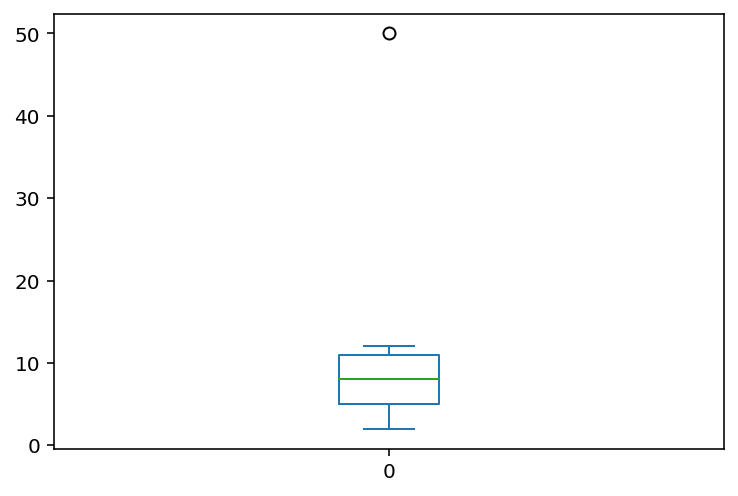

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import t
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


data = pd.DataFrame([12,4,8,10,6,2,50])

# Return outliers
def getOutliers(data, alpha):
    # Calculate outliers in data via Grub's Test
    _mean = np.mean(data)
    _std = np.std(data)
    z_scores = (data - _mean) / _std
    N = len(data)
    t_val = t.ppf(1 - alpha / (2 * N), N - 2)
    grubs_threshold = ((N-1)/np.sqrt(N)) * (np.sqrt(t_val**2 / ((N - 2 + t_val**2))))
    outliers = z_scores.abs() >= grubs_threshold
    return outliers

# Print outliers
def printOutliers(data, outliers):
    for x in range(len(data)):
        if outliers.to_numpy()[x][0] == True:
            print(data.to_numpy()[x][0], "is an outlier")



outliers = getOutliers(data, 0.95)

# Print outliers
printOutliers(data, outliers)

# Show box plot
data.plot(kind="box")



**Part B (5 points):**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 3, 3, 50, 6, 6, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

50 is an outlier


<AxesSubplot:>

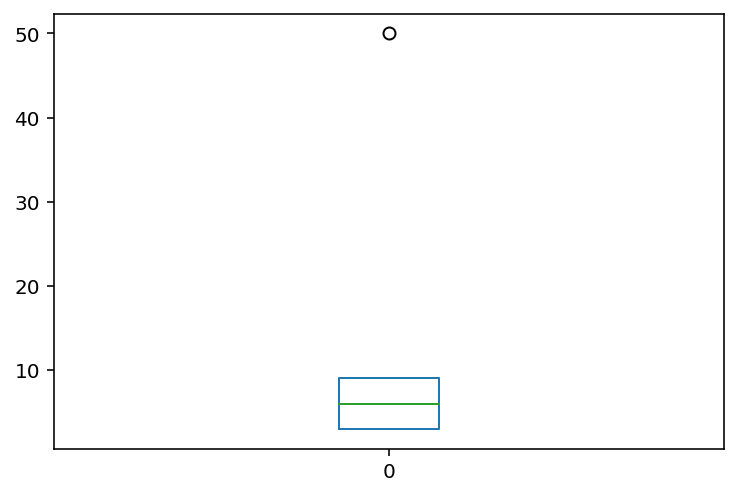

In [192]:
data2 = pd.DataFrame([6, 3, 9, 6, 9, 3, 3, 50, 6, 6, 9, 9, 3, 6, 3])
outliers2 = getOutliers(data2, 0.95)

# Print outliers:
printOutliers(data2, outliers2)

# Show box plot
data2.plot(kind="box")

**Part C (20 points):**

Use the dataset attached for identifying the outliers using Z-score. 

Steps to follow in this question

- Step1(5 points): Show outliers using histograms and scatterplots. Then 

- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3(4 points): Print the number of outliers removed.

- Step4(6 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

In [179]:

# Read data
df = pd.read_csv('outlier_assignment.csv')
print(len(df.columns), "columns:")
print(list(df.columns))


81 columns:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAre

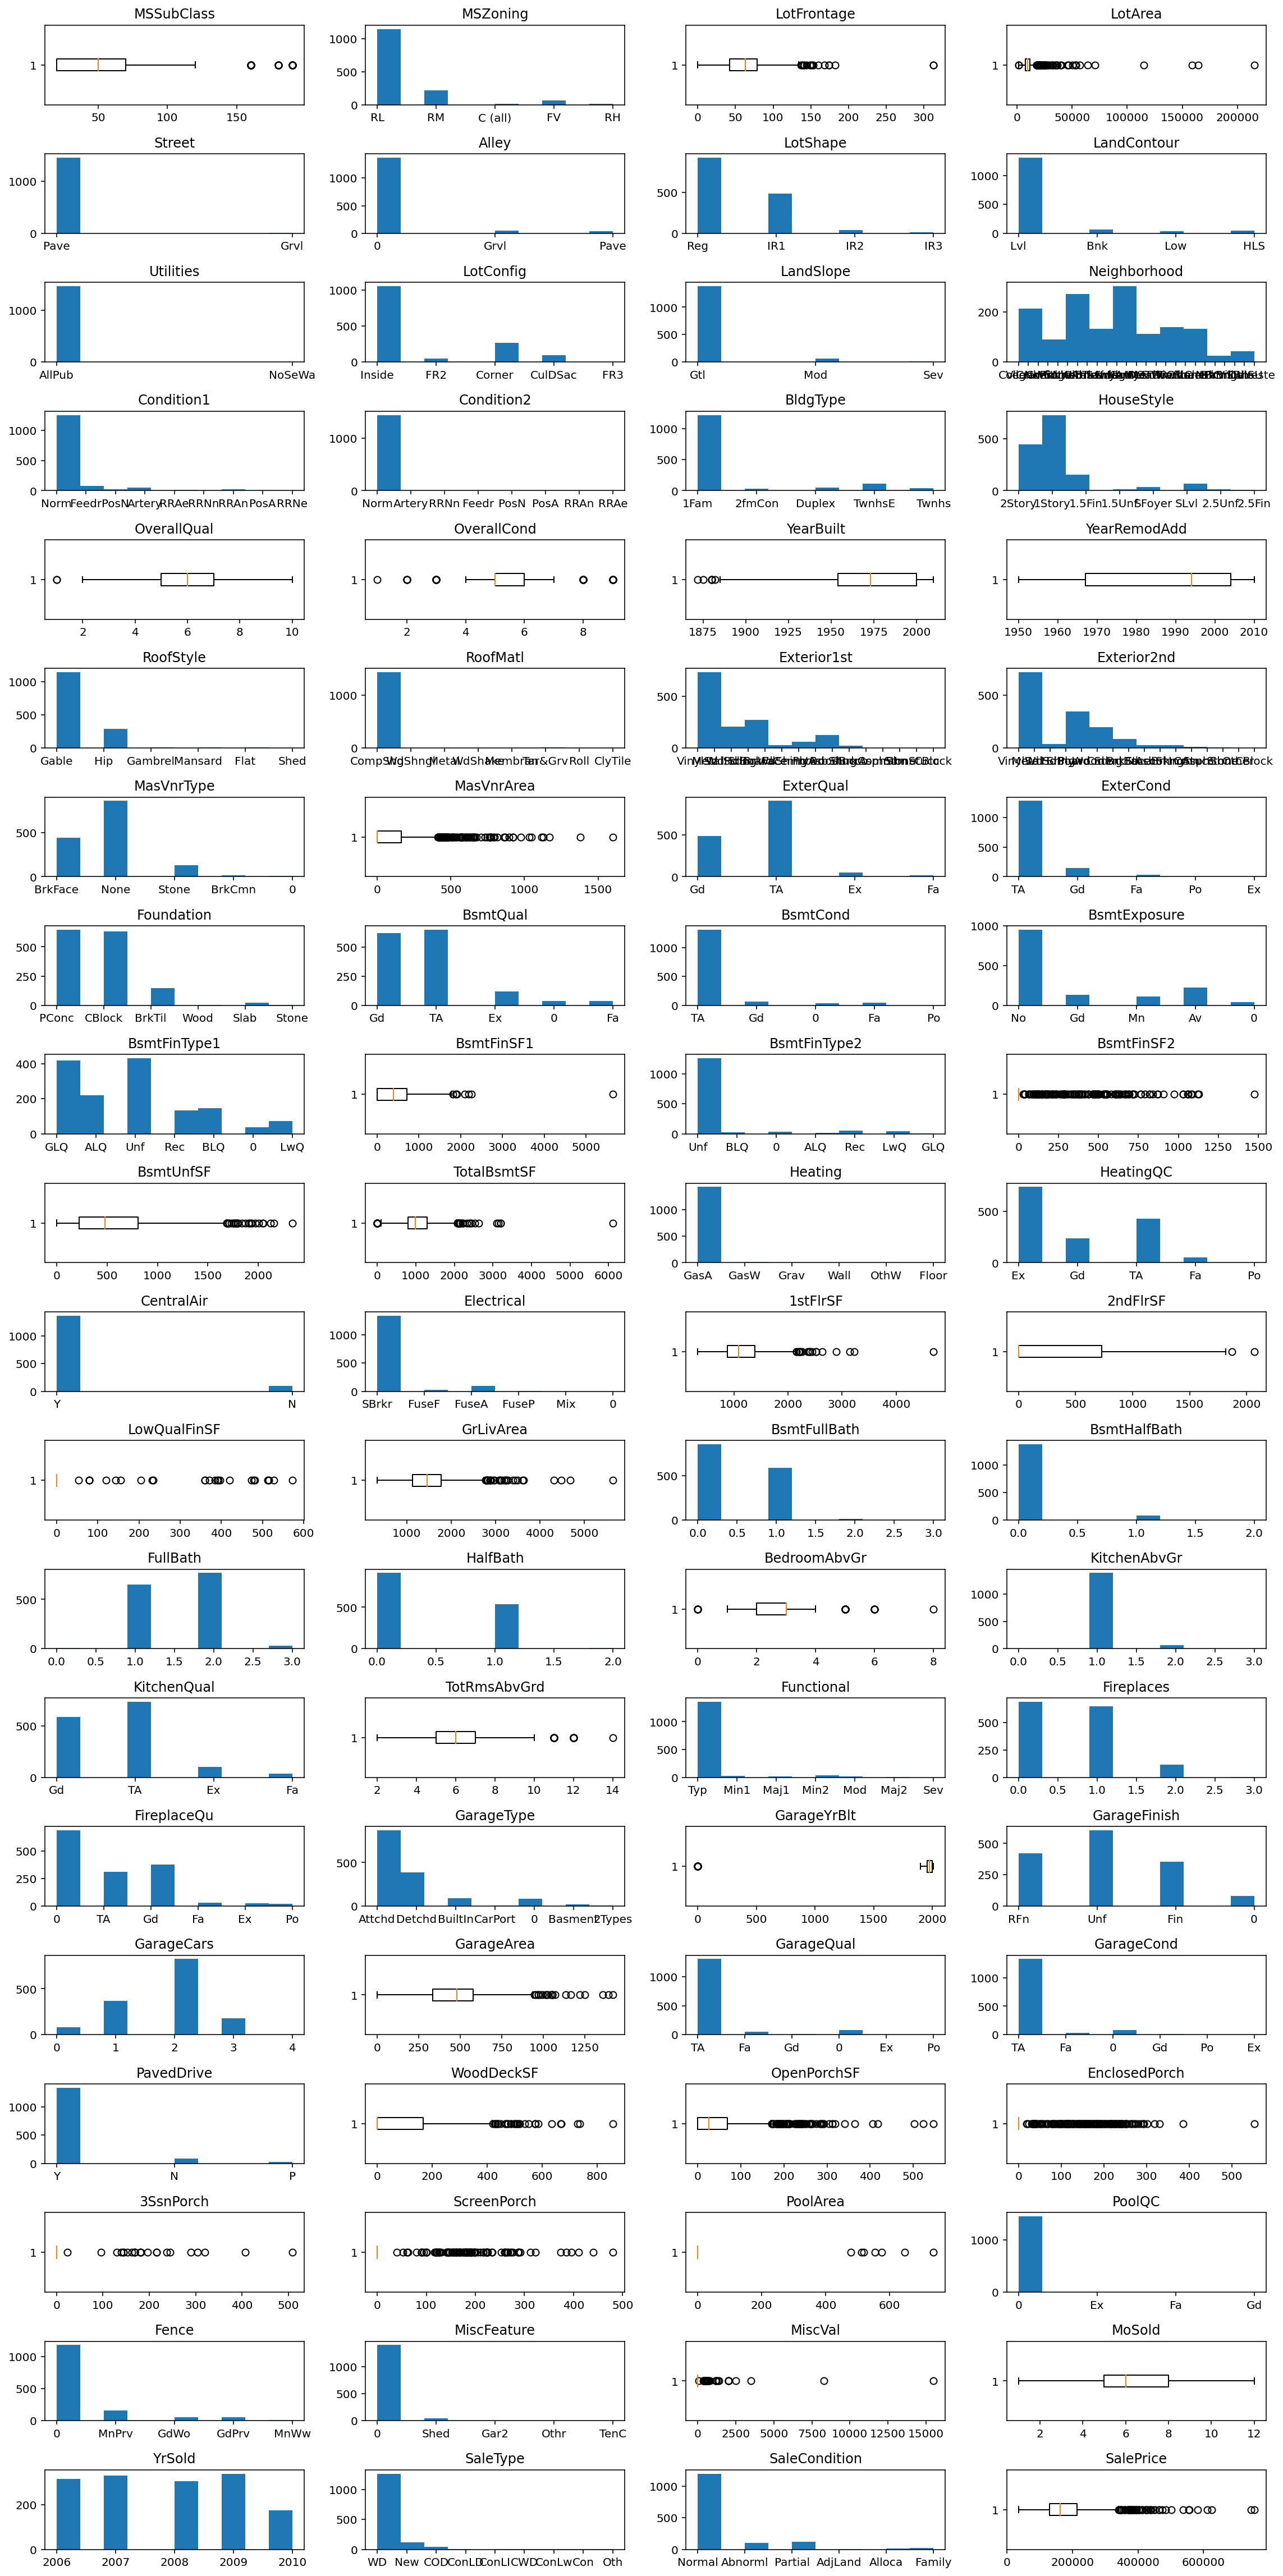

In [177]:
from pandas.api.types import is_numeric_dtype, is_string_dtype
import sklearn.preprocessing as pre

# Get numeric vs. non-numeric columns
df_non_numeric = df.select_dtypes(include='object')
df_numeric = df.drop(columns=list(df_non_numeric.columns))

# Show plots
fig, ax = plt.subplots(20,4, figsize=(16,32))
for x in range(1, 81): # For each feature (except for 'id')...
    if list(df.columns)[x] in df_non_numeric.columns: #If the column is non numeric -> use histogram
        rr = df.iloc[:,x].astype(str)
        plt.subplot(20,4,x)
        plt.gca().set_title(list(df.columns)[x])
        plt.hist(rr)
    elif df.iloc[:,x].nunique() > 5: # If there are more than 5 unique values -> use box plot
        plt.subplot(20,4,x)
        plt.gca().set_title(list(df.columns)[x])
        plt.boxplot(df.iloc[:,x], vert=False)
    else: # If 5 or less unique values, show using histogram
        plt.subplot(20,4,x)
        plt.gca().set_title(list(df.columns)[x])
        plt.hist(df.iloc[:,x])
plt.tight_layout()




<AxesSubplot:>

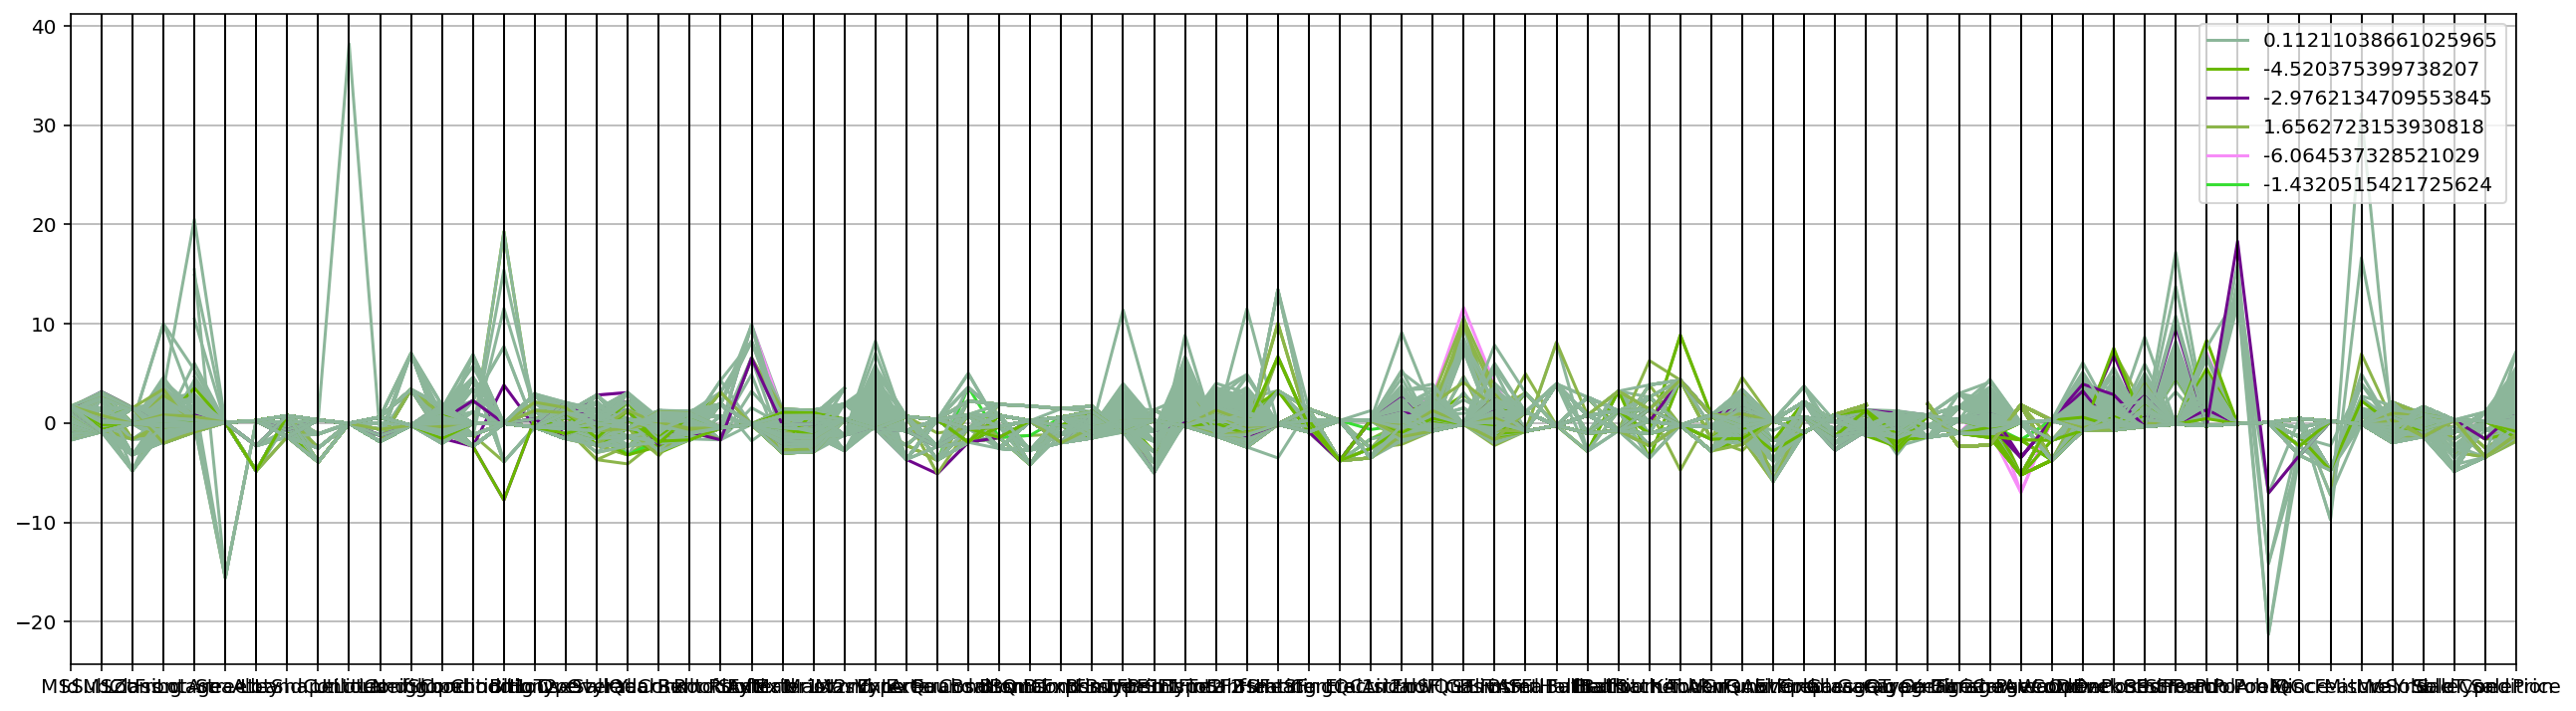

In [180]:
# Show outliers using a scatterplot with X-axis = features and y-axis = normalized data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Transform all features to numeric
def transformtoNumeric(X):
    op = X.copy()
    le = pre.LabelEncoder()
    for col in list(X.columns):
        if is_string_dtype(X[col]):
            le.fit(X[col])
            op[col] = le.transform(X[col])
        # op[col] = pd.to_numeric(X[col], errors="coerce")
    return op

df_numeric = transformtoNumeric(df)

# Scale the data
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_numeric), columns=list(df.columns))

# Plot on one scatter plot
fig = plt.figure(figsize=(22,6))
pd.plotting.parallel_coordinates(frame=df_std, class_column="GarageQual")



In [199]:
# Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

# Threshold = 0.99
alpha = 0.99
outliers = getOutliers(df_numeric, alpha)
print("The following indices are outliers at alpha =", alpha, ":")
print(list(outliers['SalePrice'][outliers['SalePrice'] == True].index))

# Threshold = 0.9
alpha = 0.9
outliers = getOutliers(df_numeric, alpha)
print("The following indices are outliers at alpha =", alpha, ":")
print(list(outliers['SalePrice'][outliers['SalePrice'] == True].index))

# Threshold = 0.75
alpha = 0.75
outliers = getOutliers(df_numeric, alpha)
print("The following indices are outliers at alpha =", alpha, ":")
print(list(outliers['SalePrice'][outliers['SalePrice'] == True].index))

# Threshold = 0.5
alpha = 0.5
outliers = getOutliers(df_numeric, alpha)
print("The following indices are outliers at alpha =", alpha, ":")
print(list(outliers['SalePrice'][outliers['SalePrice'] == True].index))


The following indices are outliers at alpha = 0.99 :
[178, 185, 440, 591, 691, 769, 798, 803, 898, 1046, 1169, 1182, 1243, 1373]
The following indices are outliers at alpha = 0.9 :
[178, 185, 440, 691, 769, 798, 803, 898, 1046, 1169, 1182, 1243, 1373]
The following indices are outliers at alpha = 0.75 :
[178, 185, 440, 691, 769, 798, 803, 898, 1046, 1169, 1182, 1243, 1373]
The following indices are outliers at alpha = 0.5 :
[178, 185, 440, 691, 769, 798, 803, 898, 1046, 1169, 1182, 1243, 1373]


In [201]:
# Print the number of outliers removed
outliers = getOutliers(df_numeric, 0.95)
print(len(outliers['SalePrice'][outliers['SalePrice'] == True]), "outliers removed")

14 outliers removed


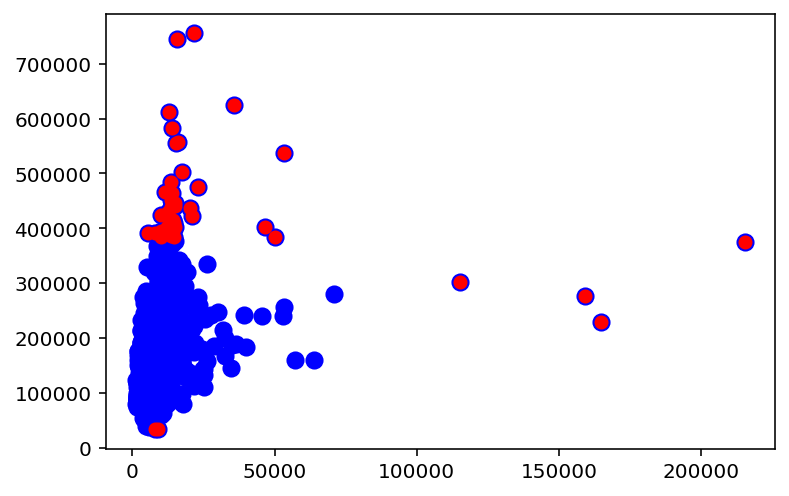

In [233]:
# Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns

# Build model
model1 = LocalOutlierFactor(n_neighbors = 500, metric = "manhattan", contamination = 0.03)
# PRedict outliers
y_pred = model1.fit_predict(df_numeric[['LotArea','SalePrice']])
# Create outlier_index... -1 values are outliers
outlier_index = np.where(y_pred == -1)
outlier_values = df_numeric.iloc[outlier_index]
# Create plot
p1 = plt.scatter(df_numeric["LotArea"], df_numeric["SalePrice"], color = "b", s = 65)
p2 = plt.scatter(outlier_values["LotArea"], outlier_values["SalePrice"], color = "r")
plt.ylabel = "SalePrice"
plt.show()
